# Lab 1 - Introduction to decision trees

Name and ID:Chen Harel 205566292

# Load data from Kaggle:
# Step 1: Download API Credentials
To download data from Kaggle, you need to authenticate with the Kaggle services. For this purpose, you need an API token. This token can be easily generated from the profile section of your Kaggle account. If you dont have an account yet, create one. 
Else, navigate to your Kaggle profile and then


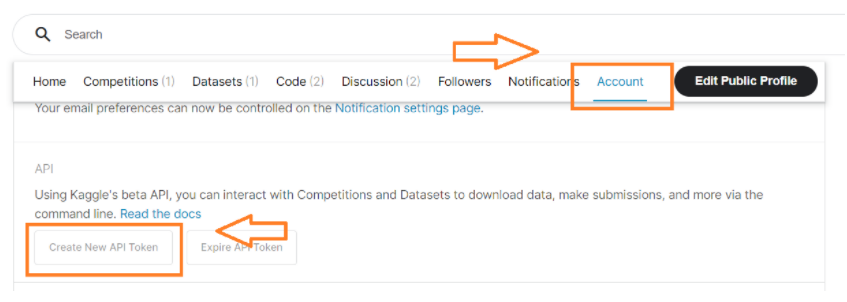

download API credentials
Click the Account tab and then scroll down to the API section (Screenshot from Kaggle profile)

A file named “kaggle.json” will be download which contains the username and the API key.

This is a one-time step and you don’t need to generate the credentials every time you download the dataset.

# Step 2: Setup the Colab Notebook
On a Google Colab notebook, connect to the cloud instance (basically start the notebook interface). Then, upload the “kaggle.json” file that you just downloaded from Kaggle.

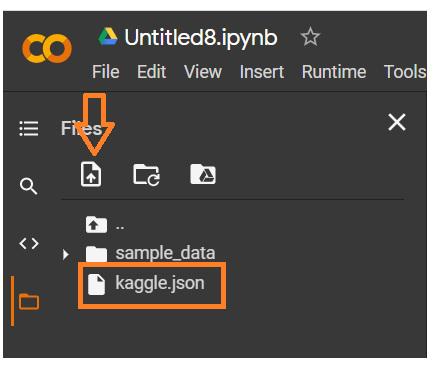

Now you are all set to run the commands need to load the dataset. Follow along with these commands:

Note: Here we will run all the Linux and installation commands starting with “!”. As Colab instances are Linux-based, you can run all the Linux commands in the code cells.
run the code bellow:

In [ ]:
# 1. Install the Kaggle library
! pip install kaggle
# 2. Make a directory named “.kaggle”
! mkdir ~/.kaggle
# 3. Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/
# 4. Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download dataset
Kaggle host two types of datasets: Competitions and Datasets. The procedure to download any type remains the same with just minor changes.
Today we are going to work with a dataset.
Run the code bellow to download the penguin dataset:

In [ ]:
! kaggle datasets download parulpandey/palmer-archipelago-antarctica-penguin-data

  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 6.54MB/s]


In case you get a dataset with a zip extension, you can simply use the unzip command of Linux to extract the data:

In [ ]:
! unzip palmer-archipelago-antarctica-penguin-data.zip

Archive:  palmer-archipelago-antarctica-penguin-data.zip
  inflating: penguins_lter.csv       
  inflating: penguins_size.csv       


# About the dataset
It is created by Dr.Kristen Gorman and the Palmer Station, Antarctica LTER.
 This dataset is essentially composed of two datasets, each containing the data of 344 penguins.

In this dataset, there are 3 different species of penguins coming from 3 islands in the Palmer Archipelago. These three classes are Adelie, Chinstrap, and Gentoo. 


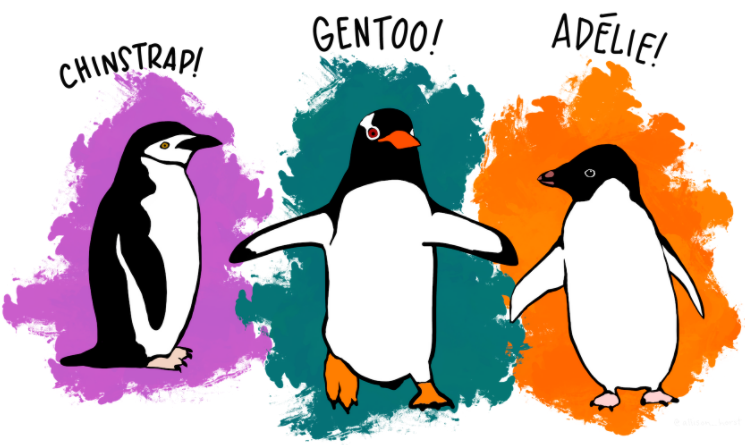


Also, these datasets contain culmen dimensions for each species. The culmen is the upper ridge of a bird’s bill. we will use features based on penguins’ culmen measurement. You can learn more about the penguins’ culmen with the illustration below:


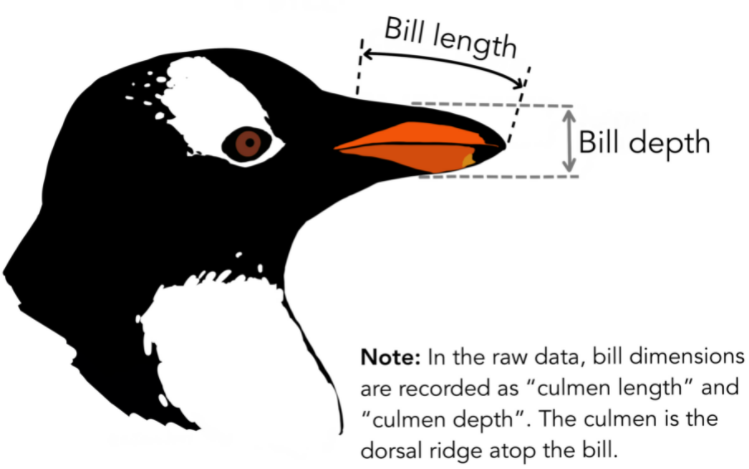
 
 In the simplified penguin’s data, culmen length and depth are renamed as variables culmen_length_mm and culmen_depth_mm.

In [ ]:
import pandas as pd


data = pd.read_csv("penguins_size.csv")
data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Task 1:
Analyse the dataset and answer the following:

1.   How many penguins are Adelie, Chinstrap, and Gentoo? what is the distribution of the labels?
2.   Is the dataset balanced?
3.   How many NAs values are there? in which columns?
4.   For each of the numeric fetures, what is the mean and standard deviation?
5.   What is the mode value for the categorical features?






In [ ]:
# 1.1
data['species'].value_counts()


Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

1.2.The data set is not fully balanced, as we can see we have smaller amount of Chinstrap species.

In [ ]:
# 1.3
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# 1.4
data.describe()[1:3]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536


In [ ]:
# 1.5
data[['species','island','sex']].mode()

,species,island,sex
0,Adelie,Biscoe,MALE


## Task 2:
Remove NAs

Use label encoder to encode categorical values

Create an X dataframe containing the features and a y vector with only the'species' column. 

Split the data into train and test with 10% for the test

In [ ]:
from sklearn import preprocessing
from sklearn import model_selection

In [ ]:
# Remove NAs
data = data.dropna()

In [ ]:
# Encoding categorial values.

# df for Dataframe, labels = list of col labels
def encoding(df,labels): 
  for label in labels:
    le = preprocessing.LabelEncoder()
    new_col = le.fit_transform(df[label])
    df['encoded_'+label] = new_col

encoding(data,['species','island','sex'])


In [ ]:
# X dataframe
X = data.drop(columns = ['species','island','sex','encoded_species'])

# y vector
y = data[['species']]


In [ ]:
# Splitting into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.10, random_state=40)

## Task 3:
Create a simple decision tree using sklearn.tree.DecisionTreeClassifier.

Choose the criteria, max depth, and min samples split parameters **as you see fit.**

For each parameter try 2 different values - total of 8 models

Train your model on the train set.

In [ ]:
# implement here
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Some people said we are not allowed to use GridSearch, so this function return a list of 8 different classifiers.
def tree_models(criterions,depths, min_samples):
  trees = []
  for c in criterions:
    for d in depths:
      for m in min_samples:
        trees.append(DecisionTreeClassifier(criterion = c, max_depth = d, min_samples_split = m).fit(X_train,y_train))
  return trees

clfs = tree_models(criterions=['gini','entropy'],depths=[10,3],min_samples=[3,15])


In [ ]:
# Each classifier and his params
clfs

[DecisionTreeClassifier(max_depth=10, min_samples_split=3),
 DecisionTreeClassifier(max_depth=10, min_samples_split=15),
 DecisionTreeClassifier(max_depth=3, min_samples_split=3),
 DecisionTreeClassifier(max_depth=3, min_samples_split=15),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=15),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=15)]

## Task 4:
Select the best model by testing on the test set, caculate accuracy and print it with 3 digits after the floating point

Plot the selected model using tree.plot_tree

Does your model overfit? what can you do to fix it? (in your answer refer to criterion, max_depth, min_samples_split)

In [ ]:
accuracy_list = []
for clf in clfs:
  prediction = clf.predict(X_test)
  accuracy_list.append(round(accuracy_score(y_test,prediction),3))


In [ ]:
# Looking for the best accuracy on the test set
for i in range(len(accuracy_list)):
  print(clfs[i],str(" Accuracy=" +str(accuracy_list[i])))

DecisionTreeClassifier(max_depth=10, min_samples_split=3)  Accuracy=1.0
DecisionTreeClassifier(max_depth=10, min_samples_split=15)  Accuracy=1.0
DecisionTreeClassifier(max_depth=3, min_samples_split=3)  Accuracy=1.0
DecisionTreeClassifier(max_depth=3, min_samples_split=15)  Accuracy=1.0
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3)  Accuracy=0.971
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=15)  Accuracy=0.971
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)  Accuracy=0.941
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=15)  Accuracy=0.941


I chose DesicionTree number 3, Max depth of 3, min sample of 3 and accuracy of 1.0


As we can see the models didnt overfit, because they return good results on the test data.

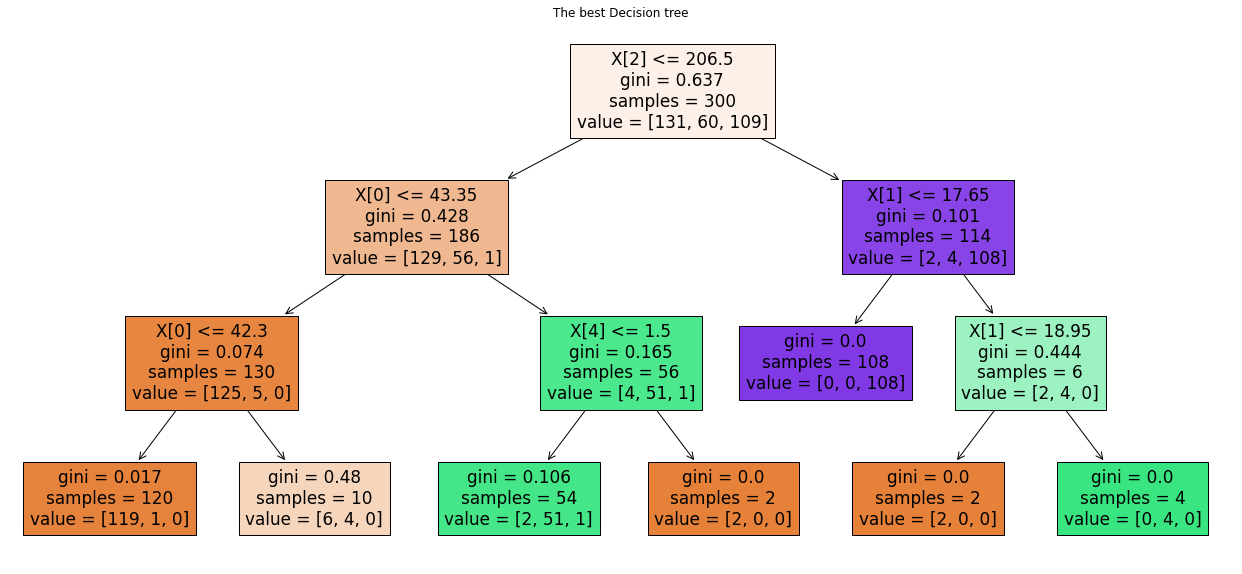

In [ ]:
plt.figure(figsize=(22,10))
best_clf = clfs[2]
plot_tree(best_clf, filled=True)
plt.title("The best Decision tree")
plt.show()



## Task 5:
Convert the notebook into html:


1.   Download the notebook by clicking the File tab
2.   In the directory of the file open cmd
3.   Run the command:
```
 jupyter nbconvert --to html notebook.ipynb 
```
4.   If jupyter is not installed on your computer, install it:  
https://jupyter.org/install



